<a href="https://colab.research.google.com/github/b04201025/math.ai.hw/blob/master/hw8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten, concatenate, add, Input
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt


from keras.datasets import mnist


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train_1 = x_train / x_train.max()
x_test_1 = x_test / x_test.max()

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
model = Sequential()

model.add(Dense(256, input_dim=784,
                kernel_initializer='normal',
                bias_initializer='zeros'))
model.add(Activation('relu'))



model.add(Dense(10,
                kernel_initializer='normal',
                bias_initializer='zeros'))
model.add( Activation('softmax'))

In [31]:
from keras import optimizers

# 所有参数梯度将被裁剪，让其l2范数最大为1：g * 1 / max(1, l2_norm)
sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, epochs=10, batch_size=800)

train_history = model.fit(x=x_train, y=y_train, epochs=10, batch_size=800)  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 1s 11us/step - loss: 7.2759 - acc: 0.5388
Epoch 2/10
60000/60000 [==============================] - 0s 6us/step - loss: 4.3822 - acc: 0.7224
Epoch 3/10
60000/60000 [==============================] - 0s 6us/step

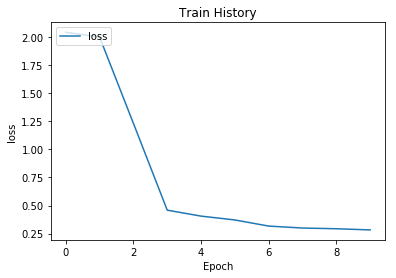

In [32]:
plt.plot(train_history.history['loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 

In [33]:

score = model.evaluate(x_test,y_test)

print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1])


10000/10000 [==============================] - 0s 49us/step
測試資料的 loss: 0.4903077158215861
測試資料正確率: 0.9655


# 有分岔的神經網路

In [34]:
f_1 = Dense(128, activation='relu')
f_2 = Dense(128, activation='relu')
f_3 = Dense(10, activation='softmax')


x = Input(shape=(784,))
h_1 = f_1(x)
h_2 = f_2(x)
u = concatenate([h_1, h_2])
y = f_3(u)

model = Model(x, y)
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=800)
train_history = model.fit(x=x_train, y=y_train, epochs=10, batch_size=800)  




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 128)          100480      input_7[0][0]                    
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 128)          100480      input_7[0][0]                    
__________________________________________________________________________________________________
concatenate_7 (Concatenate)     (None, 256)          0           dense_28[0][0]                   
                                                                 dense_29[0][0]                   
__________

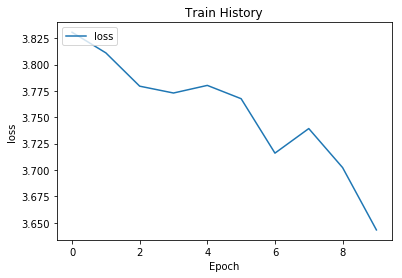

In [35]:
plt.plot(train_history.history['loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 

In [36]:

score = model.evaluate(x_train, y_train)
print("Loss: %f" %score[0])
print("準確率: %f" %(score[1]*100))

60000/60000 [==============================] - 2s 39us/step
Loss: 3.668849
準確率: 77.121667


# 可以發現，同樣的 parameter 之下，原本的 model 效果比較好